in this notebook we will generate summary for each hotel description because its more than the max length of embedding model

## import packages

In [2]:
import ollama
import pandas as pd
import matplotlib.pyplot as plt

## Load processed data

In [3]:
df = pd.read_csv('processed_data.csv')

In [4]:
df.shape

(5997, 15)

## Build summary function using ollama and gemma:2b model

In [63]:
def summarization_model(text_input):
    template = f"""
                summary this content in less than 100 words, return it in english language:
                the content is :
                {text_input}

                the summary is:
                """
    
    return ollama.generate(model = 'gemma2:2b', prompt = template)['response']

## Check hotel description length

In [66]:
df['hotel_description_length'] = df['hotel_description'].apply(lambda text: len(text.split(' ')))

<Axes: ylabel='Frequency'>

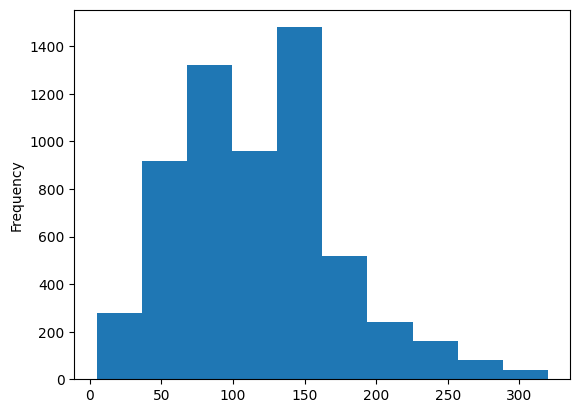

In [68]:
df['hotel_description_length'].plot(kind = 'hist')

In [69]:
df['hotel_description_length'].describe()

count    5997.000000
mean      116.751376
std        57.209460
min         5.000000
25%        73.000000
50%       110.000000
75%       151.000000
max       320.000000
Name: hotel_description_length, dtype: float64

## Generate summary of the description

In [70]:
summary_dict = {}

for text in df['hotel_description'].unique():
    summary_dict[text] = summarization_model(text)

df['hotel_description_summary'] = df['hotel_description'].map(summary_dict)

## Save new dataframe with generated summary

In [72]:
df.to_csv('data_with_summary.csv', index = False)